In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sktda
import matplotlib.pyplot as plt

In [2]:
from ripser import ripser
from ripser import Rips
from persim import plot_diagrams

In [3]:
t_sample = pd.read_csv('train.csv')

In [4]:
t_sample['click_time_hour'] = t_sample['click_time'].str[11:13]
t_sample['click_time_hour'] = t_sample['click_time_hour'].astype(int)
t_sample['click_time_hour'] = (t_sample['click_time_hour']/4).astype(int)
t_sample = t_sample.drop(['click_time', 'attributed_time'], axis = 1)

Now try to do feature selection


In [5]:
df2=t_sample.copy()


In [6]:
df2['dev_bin']=pd.cut(df2['device'],bins=[0,4,10,50,100,1000])
df2['app_bin']=pd.cut(df2['app'],bins=[0,5,10,50,100,1000])
df2['ip_bin']=pd.cut(df2['ip'],bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,17000,25000,400000])
df2['channel_bin']=pd.cut(df2['channel'],bins=30)
df2['os_bin']=pd.cut(df2['os'],bins=[0,5,10,15,20,25,50,100,1000])

In [7]:
df2=df2.drop(['ip','app','device','os','channel'],axis=1)
df2=df2.astype('category')
df2 = df2.apply(lambda x: x.cat.codes)

In [8]:
#df2.head()

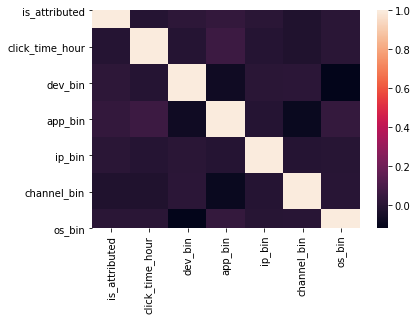

In [9]:
corr = df2.corr()
import seaborn as sns
sns.heatmap(corr)

In [10]:
train2 = df2.sample(n=1000, random_state = 0)

In [63]:

from sklearn.cluster import KMeans
f1=train2['ip_bin'].values
f2=train2['channel_bin'].values
X=np.matrix(list(zip(f1,f2)))
kmeans=KMeans(n_clusters=2).fit_predict(X)
#plt.scatter(f1,f2,c=kmeans)

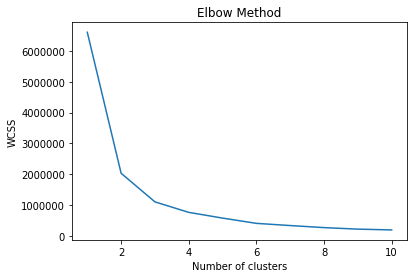

In [58]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

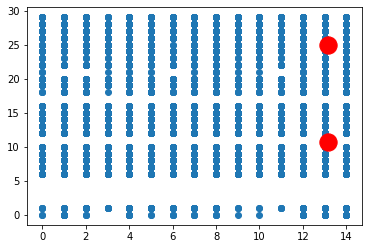

In [60]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(f1, f2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

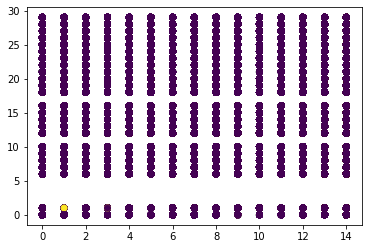

In [69]:
plt.scatter(train2['ip_bin'], train2['channel_bin'],c=train2['is_attributed'] )

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X = df2[['click_time_hour', 'dev_bin','app_bin','ip_bin','channel_bin','os_bin']]

In [33]:
pca.fit_transform(X)

array([[-6.40476058, -0.85345245,  0.98462374, -0.86752673],
       [-6.40671315,  0.14783394,  1.01546271,  0.12915755],
       [-6.40476058, -0.85345245,  0.98462374, -0.86752673],
       ...,
       [-0.40048606, -0.83679424,  1.95003977, -0.90889629],
       [ 0.62077356, -0.8237468 ,  2.17535951,  2.1805465 ],
       [ 7.62070532, -0.81477432,  2.06232074,  0.18388526]])

In [34]:
pca.explained_variance_ratio_

array([0.83758703, 0.09311272, 0.03181017, 0.02477115])

In [36]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_ratio_

array([0.83758703, 0.09311272, 0.03181017, 0.02477115])

In [38]:
pca.components_

array([[ 4.71341481e-03, -2.19996568e-04,  1.09992333e-02,
         1.73067124e-03, -9.99926851e-01, -2.21900901e-04],
       [ 6.70776395e-03, -5.38657922e-04,  3.71723034e-03,
        -9.99968204e-01, -1.65840837e-03,  1.31819042e-03],
       [ 9.97523339e-01, -1.51099569e-03,  5.86502993e-02,
         6.95114276e-03,  5.35121794e-03,  3.77901223e-02],
       [-4.06535595e-02, -1.48317529e-02,  4.79116398e-02,
         1.22867382e-03,  1.19334527e-04,  9.97912951e-01]])

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


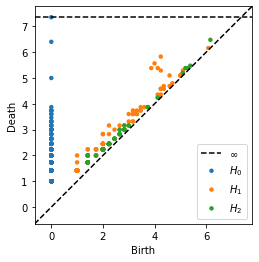

In [11]:
rips = Rips(maxdim=2)
a = rips.fit_transform(train2)
plot_diagrams(a, show = True)